In [56]:
from PIL import Image, ImageOps
import glob

def seeImage(imagePath):
    """
    Displays an image with a given path
    """
    with Image.open(imagePath) as im:
        im.show()

In [61]:
def verifyIfAllImagesHaveTheSameSize(imageDirectoryPath):
    """
    Returns True if all images from the given directory have the same size, False otherwise
    imageDirectoryPath: path of directory that contains all images
    """

    size = 0, 0
    for imagePath in glob.glob(imageDirectoryPath):
        image = Image.open(imagePath)
        if size == (0, 0):
            size = image.size
        elif image.size != size:
            return False
    
    return True

def changeSizeForAllImages(imageDirectoryPath):
    """
    Changes all image sizes from the given directory if they all have different sizes
    imageDirectoryPath: path of directory that contains all images
    Return all iamges
    """
    resizedImages = []

    if not verifyIfAllImagesHaveTheSameSize(imageDirectoryPath):
        for imagePath in glob.glob(imageDirectoryPath):
            image = Image.open(imagePath)
            resizedImage = image.resize((128,128))
            resizedImages.append(resizedImage)
    return resizedImages
 

In [57]:
def changeImagesToGrayScale(imageDirectoryPath):
    """
    Changes all images to gray scale
    imageDirectoryPath: path of directory that contains all images
    Return all iamges
    """
    grayImages = []
    for imagePath in glob.glob(imageDirectoryPath):
        image = Image.open(imagePath)
        grayImage = ImageOps.grayscale(image)
        grayImages.append(grayImage)
    
    return grayImages

In [64]:
import matplotlib.pyplot as plt
from PIL import ImageFilter

def beforeAndAfterBluringImage(imagePath):
    """
    Returns an image before and after it has been blurred
    imagePath: image path
    """
    image = Image.open(imagePath)
    blurredImage = image.filter(filter=ImageFilter.BLUR)

    return image, blurredImage


def showAllImagesBeforeAndAfterBlurring(imageDirectoryPath):
    """
    Returns all iamges from the given directory before and after blurring
    imageDirectoryPath: directory that contains images
    """

    beforeAndAfterImages = []
    for imagePath in glob.glob(imageDirectoryPath):
        image, blurredImage = beforeAndAfterBluringImage(imagePath)
        beforeAndAfterImages.append((image, blurredImage))
    
    noImages = len(beforeAndAfterImages)
    fig, axes =  plt.subplots(noImages, 2, figsize=(6, 5 * (noImages + 1)))

    for i, pair in enumerate(beforeAndAfterImages):
        axes[i][0].imshow(pair[0])
        axes[i][1].imshow(pair[1])

        axes[i][0].axis('off')
        axes[i][1].axis('off')

        axes[i][0].set_title('Before')
        axes[i][1].set_title('After')
    
    plt.show()


In [66]:
def beforeAndAfterImageIdentifyingEdges(imagePath):
    """
    Returns an image before and after it has found edges
    imagePath: image path
    """
    image = Image.open(imagePath)
    blurredImage = image.filter(filter=ImageFilter.FIND_EDGES)

    return image, blurredImage


def showAllImagesBeforeAndAfterIdentifyingEdges(imageDirectoryPath):
    """
    Returns all iamges from the given directory before and after finding edges
    imageDirectoryPath: directory that contains images
    """

    beforeAndAfterImages = []
    for imagePath in glob.glob(imageDirectoryPath):
        image, newImage = beforeAndAfterImageIdentifyingEdges(imagePath)
        beforeAndAfterImages.append((image, newImage))
    
    noImages = len(beforeAndAfterImages)
    fig, axes =  plt.subplots(noImages, 2, figsize=(6, 5 * (noImages + 1)))

    for i, pair in enumerate(beforeAndAfterImages):
        axes[i][0].imshow(pair[0])
        axes[i][1].imshow(pair[1])

        axes[i][0].axis('off')
        axes[i][1].axis('off')

        axes[i][0].set_title('Before')
        axes[i][1].set_title('After')
    
    plt.show()


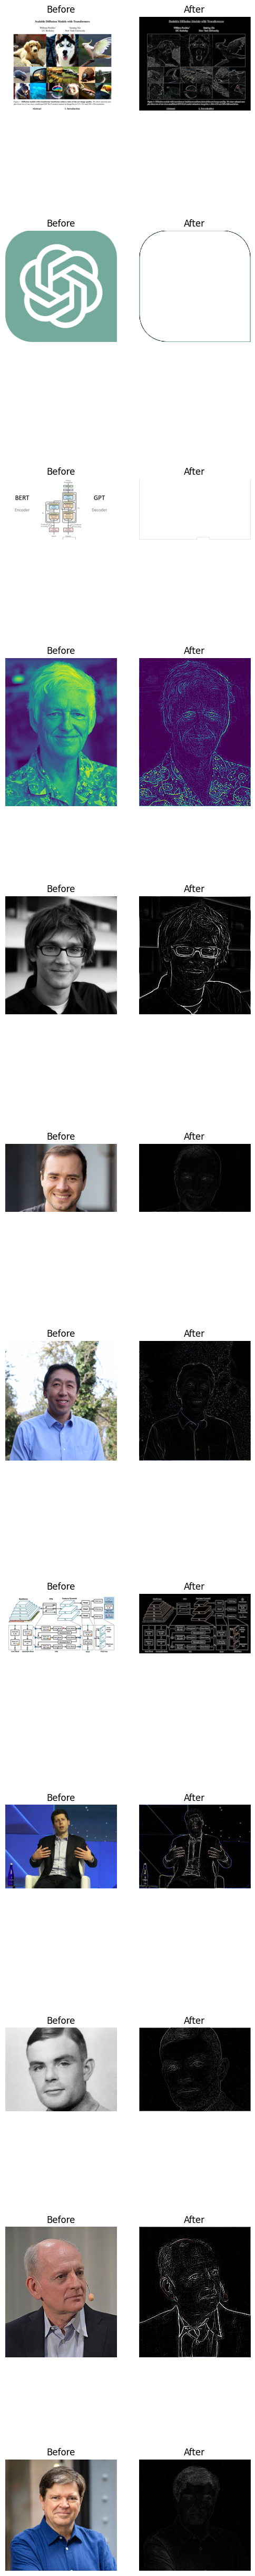

In [68]:
def main():
    #PROBLEMA 2
    #a)
        # seeImage("data_images/diffusionModel.jpg")
    #b)
        # images = changeSizeForAllImages("data_images/*")
        # for image in images:
        #     image.show()

    #c)
        # images = changeImagesToGrayScale("data_images/*")
        # for image in images:
        #     image.show()
    
    #d)
        # showAllImagesBeforeAndAfterBlurring("data_images/*")
    #e)
        showAllImagesBeforeAndAfterIdentifyingEdges("data_images/*")

main()